<h1>Problem 1. Train a machine learning model using the training file to predict the values of the ‘Dataset’ column for the test file.</h1>

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2

In [109]:
train_data=pd.read_csv('train.csv')
train_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


<h2> This problem is classification problem because the value of 'Dataset' is discrete </h2>

In [110]:
#....Handling Categorical data

#Mapping of Gender to int value (Male=1 and Female=0)

train_data['Gender']=train_data.Gender.map(dict(Male=1, Female=0))

In [111]:
#Handling NaN values

# train_data[train_data.isnull().values]
train_data.ffill(0,inplace=True)

In [112]:
train_data.shape

(466, 11)

In [113]:
train_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [114]:
train_data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,45.321888,0.774678,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.952682,1.285408
std,15.697936,0.418243,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.333188,0.452094
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,1.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,1.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<h2> Checking for Outliers,if any then will remove these outliers </h2>

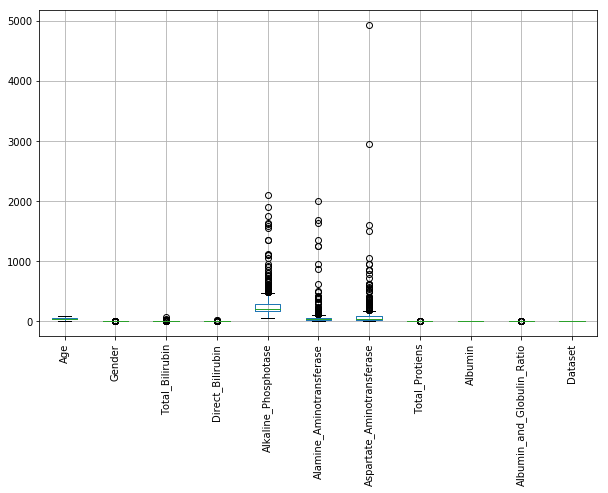

In [115]:
# Checking for outliers
plt.figure(figsize=(10,6))
train_data.boxplot()
plt.xticks(rotation=90)
plt.show()

<h2> Plotting HeatMap to visualize the correlation of independent variables with the dependent variable(Here ,"Dataset") </h2>

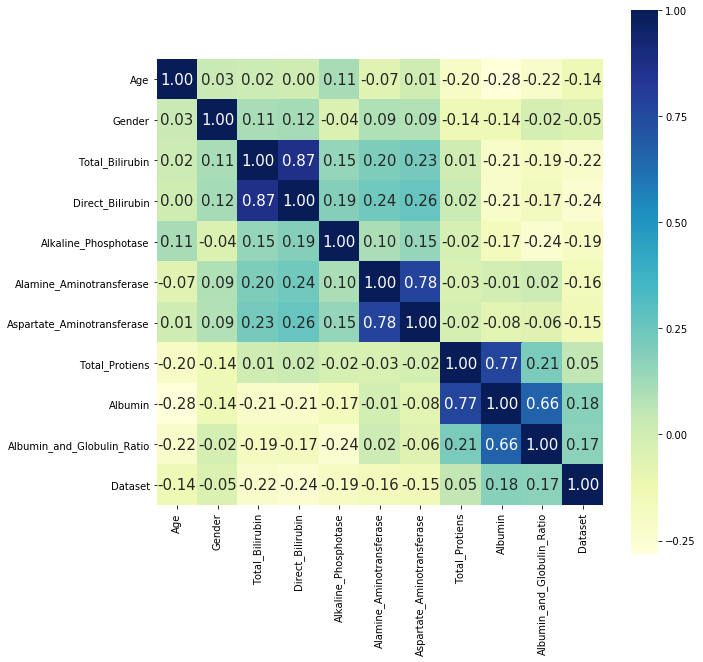

In [116]:
fig,ax=plt.subplots(figsize=(10,10))
correlations=train_data.corr()
sb.heatmap(correlations,square=True,cbar=True,cmap="YlGnBu",annot=True,fmt='.2f',annot_kws={'size':15})
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


<p><b> From the above correlation graph(Heatmap), some features are strongly related to each other. But gender and age are  not much correlated.
    1. Total_Bilirubin and Direct_Bilirubin(0.87) are much correlated.
    2.  Alamine_Aminotransferase and Aspartate_Aminotransferase(0.78) 
    3. Total_Proteins and Albumin(0.77) 
    4. Albumin_and_Globin_Ratio and Albumin(0.66) 
   <p> 

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import NuSVC

In [118]:
train_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

<h2> Features Selection... <h2>

In [146]:
#X=train_data.iloc[:,[0,1]] #74
#X=train_data.iloc[:,2:10] #77
#X=train_data.iloc[:,2:7] #77
X=train_data[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase']]

X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase
0,60,6.3,3.2,314
1,31,0.8,0.2,158
2,60,19.6,9.5,466
3,34,8.7,4.0,298
4,26,0.9,0.2,154


<h2> Traget data("Dataset") </h2>

In [120]:
# Fetching the target data

y=train_data['Dataset']
y.head()

In [121]:
# test_X=test_data.iloc[:,[0,1]]
# test_X.shape

<h2> Now Training the dataset using different classifiers models </h2>

In [148]:
#Spliiting the data into training and testing (based on random_state)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [149]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(349, 4)
(117, 4)
(349,)
(117,)


<h2> 1. Random Forest Classifier Model </h2>

rand_forest=RandomForestClassifier()
rand_forest.fit(X_train,y_train)

In [125]:
accuracy_score(rand_forest.predict(X_test),y_test)

0.7435897435897436

<h2> 2. Decision Tree Classifier Model </h2>`

In [126]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)a

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [127]:
accuracy_score(dec_tree.predict(X_test),y_test)

0.7094017094017094

<h2> 3. Logistic Regression Model </h2>

In [128]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [129]:
accuracy_score(log_reg.predict(X_test),y_test)

0.7606837606837606

<h2> 4. State Vector Machine Model </h2> 

In [133]:

clf=NuSVC()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [134]:
accuracy_score(clf.predict(X_test),y_test)

0.811965811965812

<h2> After comparing all the classifiers for this dataset....NuSVC's accuracy is best = 81.19%.
So, I will use this model to predict the values for test data.</h2>

<h1> Loading the test-data </h1>

In [157]:
test_data=pd.read_csv('test.csv')
test_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


In [158]:
test_data['Gender']=test_data.Gender.map(dict(Male=1, Female=0))

In [153]:
test_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,1,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,1,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,0,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,1,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,1,2.6,1.2,171,42,37,5.4,2.7,1.00


In [154]:
test_data.shape

(117, 10)

In [159]:
test_X=test_data[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase']]

In [160]:
clf_pred=clf.predict(test_X)
clf_pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [170]:
#Predicting 'dataset' value on test.csv data using Logistic Regression Model


lpred=log_reg.predict(test_X)
unique_elements, counts_elements = np.unique(lpred, return_counts=True)

print(unique_elements)
print(counts_elements)

[1 2]
[106  11]


<h3> Predicting 'dataset' values on test.csv data using NuSVC Model </h3>

In [171]:
#Predicting 'dataset' value on test.csv data using NuSVC Model


clf_pred=clf.predict(test_X)
clf_pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [180]:
test_data['Dataset']=clf_pred
test_data['Dataset'].value_counts()


1    102
2     15
Name: Dataset, dtype: int64

<h2> Writting the predicted values to the file( named problem1_new_test.csv)</h2>

In [181]:
test_data.to_csv("problem1_new_test.csv")

In [182]:
d=pd.read_csv("problem1_new_test.csv")
d.head()

,Unnamed: 0,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0,46,1,0.8,0.2,160,31,40,7.3,3.8,1.10,1
1,1,15,1,0.8,0.2,380,25,66,6.1,3.7,1.50,1
2,2,66,0,4.2,2.1,159,15,30,7.1,2.2,0.40,1
3,3,32,1,0.6,0.1,237,45,31,7.5,4.3,1.34,1
4,4,60,1,2.6,1.2,171,42,37,5.4,2.7,1.00,2
